In [50]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=296915e6831919d0c780aeac872895d5651a2c2f6cfb2ef5fc99b5fed87210b7
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [1]:
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (445 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking swig (3.0.12-1

In [2]:
#日本語フォントのインストール　（wordcloudなどで可視化するため）
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 3s (2,597 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 145645 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [3]:
!pip install mojimoji

     |████████████████████████████████| 133kB 2.8MB/s 


In [4]:
import MeCab
import numpy as np
import pandas as pd 
import os 
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm

import matplotlib.pyplot as plt
#import japanize_matplotlib

import seaborn as sns 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
path = "/content/drive/My Drive/movie_research/review_csv/SF_data.csv"
data = pd.read_csv(path)

In [6]:
def prepro_text(text):
  text = text.replace("\n", "")

  return text 

data["review"] = data["review"].apply(prepro_text)

In [7]:
def tokenize(sentence):
    """日本語の文を形態素の列に分割する関数

    :param sentence: str, 日本語の文
    :return tokenized_sentence: list of str, 形態素のリスト
    """
    tagger = MeCab.Tagger()
    node = tagger.parse(sentence)
    node = node.split("\n")
    tokenized_sentence = []
    for i in range(len(node)):
        feature = node[i].split("\t")
        if feature[0] == "EOS":
            # 文が終わったら終了
            break
        # 分割された形態素を追加
        tokenized_sentence.append(feature[0])
    return " ".join(tokenized_sentence)

In [8]:
data

,title,name,time,review,score,URL
0,12モンキーズ|Twelve Monkeys,ブタブタの感想・評価,2020/08/27 22:57,久々に再鑑賞。『ラ･ジュテ』が原案(て言うか原作)で更に『12モンキーズ』は『テネット』の元...,4.5,https://filmarks.com//movies/12268?page=1
1,12モンキーズ|Twelve Monkeys,いーむろの感想・評価,2020/08/26 21:13,パンデミックものですが、タイムトラベル映画です。主人公が見る夢の真相が次第に明らかになります...,3.1,https://filmarks.com//movies/12268?page=1
2,12モンキーズ|Twelve Monkeys,ちんさくの感想・評価,2020/08/26 19:06,先日見ましたなかなか面白かったです監督のセンスの良さが光っておりどのシーンも楽しめ自然と集中...,3.8,https://filmarks.com//movies/12268?page=1
3,12モンキーズ|Twelve Monkeys,宇宙弟兄の感想・評価,2020/08/26 15:59,直接的な風刺もいいな。音楽が素晴らしいのと、登場人物たちの演技がうま過ぎる。舞台演劇のよう...,3.8,https://filmarks.com//movies/12268?page=1
4,12モンキーズ|Twelve Monkeys,ナンダマの感想・評価,2020/08/24 23:02,映画の種類も好きだけど、何故か単調に感じた。主人公が正しいのか妄想の中にいるのか分からないハ...,3.7,https://filmarks.com//movies/12268?page=1
...,...,...,...,...,...,...
484298,ＵＦＯ －オヘアの未確認飛行物体－|UFO,にゃおの感想・評価,2018/12/29 23:22,オカルト大好きなのでドストライク。笑2006年、アメリカで実際に起こったUFO目撃と、電波障...,5.0,https://filmarks.com//movies/81621?page=5
484299,ＵＦＯ －オヘアの未確認飛行物体－|UFO,seriFilの感想・評価,2018/12/27 03:29,主人公、友人の男の子と女の子、それから教授の女性、全員顔のクセが独特で良かった。,3.0,https://filmarks.com//movies/81621?page=5
484300,ＵＦＯ －オヘアの未確認飛行物体－|UFO,barneyの感想・評価,2018/12/27 01:11,内なるSFオタクの知的探求心を焙り出す隠れた傑作まだレビューがかなり少ないですね。鑑賞する手...,4.5,https://filmarks.com//movies/81621?page=5
484301,ＵＦＯ －オヘアの未確認飛行物体－|UFO,SeikiOdaniの感想・評価,2018/12/17 00:48,どんだけ直球なタイトルやねん！とありがちなオカルト的アプローチなエイリアンものかと想像するも...,4.0,https://filmarks.com//movies/81621?page=5


In [9]:
data["review_tokenize"] = data["review"].apply(tokenize)
data.to_csv("/content/drive/My Drive/movie_research/review_csv/SF_data_tokenize.csv", index=False)
data["review_tokenize"]

0         久々 に 再 鑑賞 。 『 ラ ･ ジュ テ 』 が 原案 ( て 言う か 原作 ) で ...
1         パンデミック もの です が 、 タイム トラベル 映画 です 。 主人 公 が 見る 夢 ...
2         先日 見 まし た なかなか 面白かっ た です 監督 の センス の 良 さ が 光っ て...
3         　 直接 的 な 風刺 も いい な 。 音楽 が 素晴らしい の と 、 登場 人物 たち...
4         映画 の 種類 も 好き だ けど 、 何故 か 単調 に 感じ た 。 主人 公 が 正し...
                                ...                        
484298    オカルト 大好き な の で ドス トライク 。 笑 2006 年 、 アメリカ で 実際 ...
484299    主人 公 、 友人 の 男の子 と 女の子 、 それ から 教授 の 女性 、 全員 顔 の...
484300    内 なる SF オタク の 知的 探求 心 を 焙り 出す 隠れ た 傑作 まだ レビュー ...
484301    どん だけ 直球 な タイトル や ねん ！ と あり がち な オカルト 的 アプローチ ...
484302    字幕 版 を 観 まし た オヘア 国際 空港 UFO 事件 を 、 テーマ に し た 作...
Name: review_tokenize, Length: 484303, dtype: object

In [10]:
data = pd.read_csv('/content/drive/My Drive/movie_research/review_csv/SF_data_tokenize.csv')

In [15]:
drops = data[~data.title.duplicated()]
drops

,title,name,time,review,score,URL,review_tokenize
0,12モンキーズ|Twelve Monkeys,ブタブタの感想・評価,2020/08/27 22:57,久々に再鑑賞。『ラ･ジュテ』が原案(て言うか原作)で更に『12モンキーズ』は『テネット』の元...,4.5,https://filmarks.com//movies/12268?page=1,久々 に 再 鑑賞 。 『 ラ ･ ジュ テ 』 が 原案 ( て 言う か 原作 ) で ...
3205,2001年宇宙の旅|2001: A Space Odyssey,shadownight11の感想・評価,2020/08/27 19:02,何度も視聴を試みたが、なかなか最後まで見ることができなかった作品。無音のシーンを過ぎてしまう...,4.0,https://filmarks.com//movies/18064?page=1,何 度 も 視聴 を 試み た が 、 なかなか 最後 まで 見る こと が でき なかっ ...
8967,|2001: A Space Odyssey,Carolineの感想・評価,2020/08/27 13:56,もう芸術作品52年前に想像していた事がリアルになりそうな今 笑笑私的に食事シーンが印象的！モ...,-,https://filmarks.com//movies/14135?page=1,もう 芸術 作品 52 年 前 に 想像 し て い た 事 が リアル に なり そう な...
10164,|,ワンの感想・評価,2019/10/05 00:22,200X年、白鳥座X-1のブラックホールの爆発で放出された素粒子の影響で、異常に成長の早い子...,2.0,https://filmarks.com//movies/9660?page=1,200 X 年 、 白鳥 座 X - 1 の ブラック ホール の 爆発 で 放出 さ れ ...
10165,2010年|2010,shadownight11の感想・評価,2020/08/27 18:53,HAL9000は優秀すぎただけ。ちょっと説明じみてるところはあるが、正史続編納得。,2.4,https://filmarks.com//movies/21904?page=1,HAL 9000 は 優秀 すぎ た だけ 。 ちょっと 説明 じみ てる ところ は ある...
...,...,...,...,...,...,...,...
484062,|TOKYO BLACKOUT,むむむの感想・評価,2020/03/14 11:08,確か音楽はモーリス・ジャールでカッコいい曲だったと思う。それ以外は特にないです。,-,https://filmarks.com//movies/35146?page=1,確か 音楽 は モーリス ・ ジャー ル で カッコ いい 曲 だっ た と 思う 。 それ...
484102,魔界探偵ゴーゴリIII 蘇りし者たちと最後の戦い|Gogol. Strashnaya mest,木蘭の感想・評価,2020/08/26 23:49,遂に連続シリーズも第三弾（第五章＆第六章）で完結。 意外な結末・・・どころか大どんでん返し...,3.7,https://filmarks.com//movies/85126?page=1,遂に 連続 シリーズ も 第 三 弾 （ 第 五 章 ＆ 第 六 章 ） で 完結 。 ...
484182,魔界探偵ゴーゴリII 魔女の呪いと妖怪ヴィーの召喚|Gogol. Viy,木蘭の感想・評価,2020/08/26 23:40,本当にコレ、劇場で公開したの！？という連続テレビ映画としか思えない形式の第二弾（第三章＆第...,3.2,https://filmarks.com//movies/85125?page=1,本当 に コレ 、 劇場 で 公開 し た の ！ ？ と いう 連続 テレビ 映画 と...
484252,|BLACK RAIN／DARK SKIES,ポロロッカの感想・評価,2018/12/14 20:06,隠遁生活を送る天才科学者ジャックの近場で研究施設が爆発事故を起こした。まず着想に関しては「酸...,1.9,https://filmarks.com//movies/55581?page=1,隠遁 生活 を 送る 天才 科学 者 ジャック の 近場 で 研究 施設 が 爆発 事故 を...


In [16]:
#1コメントのみは削除
data = data.drop(index=drops.index, axis=0)

In [17]:
data.time = pd.to_datetime(data.time)

In [18]:
data.title.value_counts()

レディ・プレイヤー1|Ready Player One                      18879
インターステラー|Interstellar                            17679
インセプション|Inception                                13339
トゥルーマン・ショー|The Truman Show                       13094
オデッセイ|The Martian                                12999
                                                 ...  
|ADVENTURES OF JOHNNY TAO／QUEST OF THE DRAGON        1
|FINAL                                               1
|Reality+                                            1
|The New Mutants／X-Men: The New Mutants              1
|The Beast of Yucca Flat                             1
Name: title, Length: 342, dtype: int64

In [19]:
###　実験のためサンプルをチョイスして実験する
RP1 = data[data["title"] == "レディ・プレイヤー1|Ready Player One"]

In [20]:
RP1

,title,name,time,review,score,URL,review_tokenize
412300,レディ・プレイヤー1|Ready Player One,りほこの感想・評価,2020-08-27 23:27:00,テレビで観ました！色んな映画や昔の音楽を、彷彿とさせるような新しくて懐かしい映画。家族とこれ...,3.8,https://filmarks.com//movies/63747?page=1,テレビ で 観 まし た ！ 色んな 映画 や 昔 の 音楽 を 、 彷彿 と さ せる よ...
412301,レディ・プレイヤー1|Ready Player One,はちこの感想・評価,2020-08-27 23:25:00,観ていて楽しかった！シャイニングは観れていないけど。。。色々キャラクターも出てきてサブカルチ...,3.0,https://filmarks.com//movies/63747?page=1,観 て い て 楽しかっ た ！ シャイニング は 観れ て い ない けど 。 。 。 色...
412302,レディ・プレイヤー1|Ready Player One,クリリンモンローの感想・評価,2020-08-27 21:56:00,スピルバーグ監督の中で1番好きな映画観てて飽きない内容もいい,5.0,https://filmarks.com//movies/63747?page=1,スピルバーグ 監督 の 中 で 1 番 好き な 映画 観 て て 飽き ない 内容 も いい
412303,レディ・プレイヤー1|Ready Player One,オコエの感想・評価,2020-08-27 21:02:00,ゲームに没頭していた時を思い出しました。キャラの渋滞が過ぎます笑特にシャイニングの再現度がす...,4.2,https://filmarks.com//movies/63747?page=1,ゲーム に 没頭 し て い た 時 を 思い出し まし た 。 キャラ の 渋滞 が 過ぎ...
412304,レディ・プレイヤー1|Ready Player One,AIRIの感想・評価,2020-08-27 08:54:00,おまけみたいな恋愛要素はまじでいらん。謎解きもヒントもまぁ他の人も分かりそうだけどね、それ以...,3.9,https://filmarks.com//movies/63747?page=1,おまけ みたい な 恋愛 要素 は まじ で い らん 。 謎解き も ヒント も まぁ 他...
...,...,...,...,...,...,...,...
431174,レディ・プレイヤー1|Ready Player One,ているの感想・評価,2018-09-10 03:25:00,普段SFを見ない分よく感じた。昔のSFしかわからなかったが…色んな映画を見ていればより楽しめ...,4.1,https://filmarks.com//movies/63747?page=999,普段 SF を 見 ない 分 よく 感じ た 。 昔 の SF しか わから なかっ た が...
431175,レディ・プレイヤー1|Ready Player One,アンバーの感想・評価,2018-09-10 02:41:00,ゲームも好きで、映画も好きなら小ネタ満載で楽しめる。ただ、小ネタ多すぎる。観直そうとはあまり...,3.5,https://filmarks.com//movies/63747?page=999,ゲーム も 好き で 、 映画 も 好き なら 小 ネタ 満載 で 楽しめる 。 ただ 、 ...
431176,レディ・プレイヤー1|Ready Player One,たその感想・評価,2018-09-10 02:31:00,めっっっちゃ面白かった好き。だいとーがイケメン、ほんと、顔が好き仕草も好き、かっこいい何も考...,5.0,https://filmarks.com//movies/63747?page=999,め っ っ っ ちゃ 面白かっ た 好き 。 だい とー が イケメン 、 ほんと 、 顔 ...
431177,レディ・プレイヤー1|Ready Player One,のえの感想・評価,2018-09-10 02:28:00,スピルバーグありがとう！という感想を以前見かけたけど、鑑賞後その気持ちがすごく分かった。あの...,4.2,https://filmarks.com//movies/63747?page=999,スピルバーグ ありがとう ！ と いう 感想 を 以前 見かけ た けど 、 鑑賞 後 その...


In [21]:
import mojimoji
def zen_to_han(text):
    text = mojimoji.zen_to_han(text)
    return text

In [28]:
data["review_tokenize"].isnull().sum()

3

In [31]:
data.isnull().sum()

title              0
name               0
time               0
review             0
score              0
URL                0
review_tokenize    3
dtype: int64

In [32]:
data = data.dropna()
data.shape

(483933, 7)

In [33]:
data["review_tokenize"] = data["review_tokenize"].apply(zen_to_han)
data["review_tokenize"] = data["review_tokenize"].replace("。","").replace("、","")

In [34]:
def length(text):
  text = text.split(' ')
  return len(text)

In [35]:
data["word_num"] = data["review_tokenize"].apply(length)

##数値カラムにできる列の前処理

In [36]:
def prepro1(df, col, word):
  df = df.copy() 
  #null check
  df[col] = df[col].fillna(np.nan)
  df[col] = df[col].apply(lambda x: x.replace(word, "") )
  df[col] = df[col].astype(float)

  return df

In [37]:
def prepro2(df, col, word):
  df = df.copy() 
  #null check
  df[col] = df[col].fillna(np.nan)
  df[col] = df[col].apply(lambda x: x.replace(word, "") )
  df[col] = df[col].apply(lambda x: x.replace('-', "-1") )
  df[col] = df[col].astype(float)

  return df

In [38]:
def prepro3(df, col, word):
  df = df.copy() 
  #null check
  df[col] = df[col].apply(lambda x: x.replace(word, "") )

  return df

In [39]:
data = prepro2(data, "score", "点")

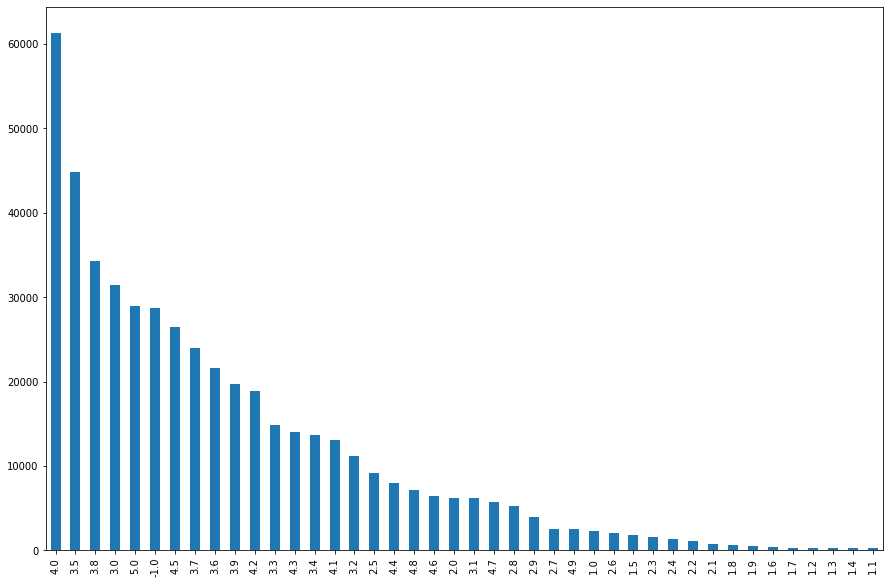

In [40]:
data["score"].value_counts().plot(kind='bar',figsize=(15, 10))

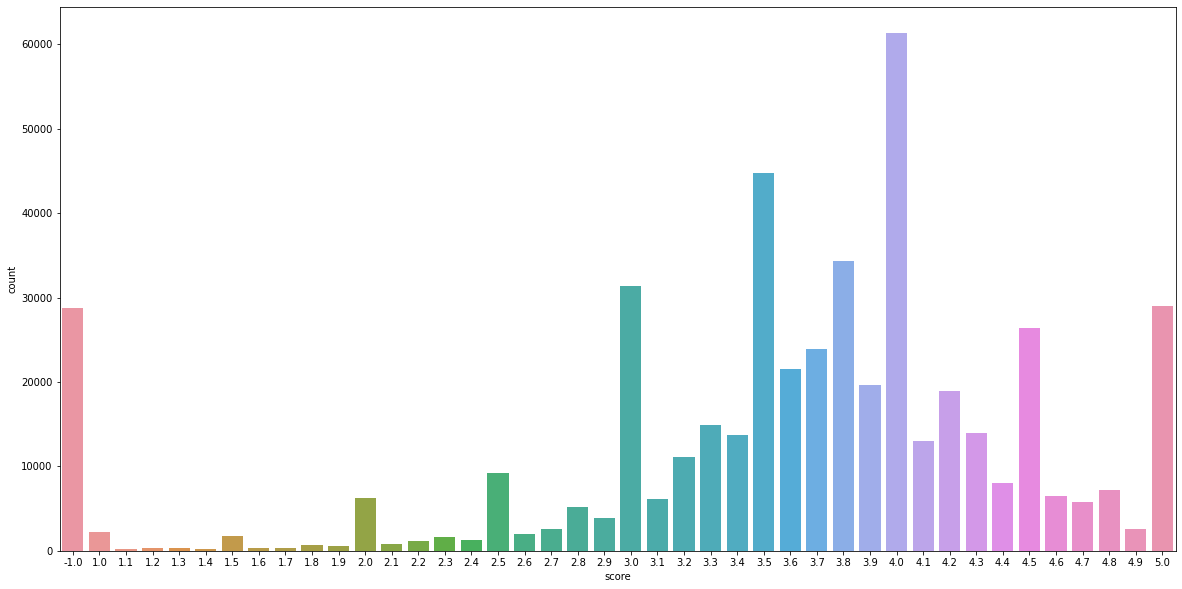

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(data.score)

In [42]:
#点数がつけられていない件数
len(data[data["score"]==-1] )

28743

In [46]:
for i,j in enumerate(data[data["score"]==-1].review):
  print(i)
  print(j)
  if i == 100:
    break

0
見終わってからずっとスッキリしたりモヤモヤしたりが止まらない不思議な映画体験したな〜
1
「12モンキーズ」ブラピのイカれ具合が最高wwwそれに尽きるわ笑笑
2
刑務所跡で撮影した精神病院のシーンとか、何故か全裸でやるタイムトラベルとかかなり独特で面白かった
3
怖い。最初から伏線だらけで、大変面白いです。初見の時は、異常なのは自分の方なのか‥？と、主人公と共におかしくなりそうな感覚になれました。精神異常のブラッド・ピットさんが良いです。確か昨年頃からドラマ化されているそうなので、そちらも気になります。
4
頭いってるブラピが凄い。画作りはよくある90年代アメリカ映画で，複雑な脚本が際立ってた。ピアソラやサッチモが格好良い。テリー・ギリアムは『ラ・ジュテ』観てないって本当に？
5
誰しもが観てるのに、実は観てないシリーズ。さすがに面白いですな！ブルースウィリス出演の中でもブラピの中でも上位に入っちゃうくらいの役の良さ！テリーギリアムはファンタジー系しか観たことなかったから意外でますます好きになった！たまたまだけど、この時期にウィルス系観るってのは重みが違いますな。
6
今まで見た映画のリストを作っています。レビューは後で記述します。
7
過去に何回も寝てしまった作品やはりテンポが遅い気がする、長く感じた・・・ブラピの演技がすんげえ
8
ブラッドピットが神演技小学校の時に見て以来久々に見直したが最高だった
9
監督テリーギリアムの作品にしては、ストーリーが分かりやすく、すんなり入って来ました。ただ、今(2019年)に観ると色んな時代に飛んでも街とか服とか全てが「昔」でアナログでいまいちピンと来ない感じも。ただ、ブルースウィルスもブラピも私の知っている全盛期の見た目と若さなので、そこはしっくり来ました。やっぱり作った時代に過去や未来を純粋に楽しんで観るのが一番ワクワクしますね。
10
ずっといろんな人にオススメされていながらもみてなかったやつやっと鑑賞。95年の映画なのね〜生まれた年だwいやー面白かった！ストーリーも面白いし、音楽もいいし、演技もひかる。ブラピすごいなあ〜展開がわかりやすいっちゃわかりやすいのかもしれないけど、おもしろくて、2時間超えてる感じしなかった。みんながオススメするのも納得。ひとりで夜に部屋真っ暗にして観ると後味も悪くて超最高だったわ。w
1

In [47]:
data2 = data[data["score"] != -1.0]

Text(0.5, 0, 'score')

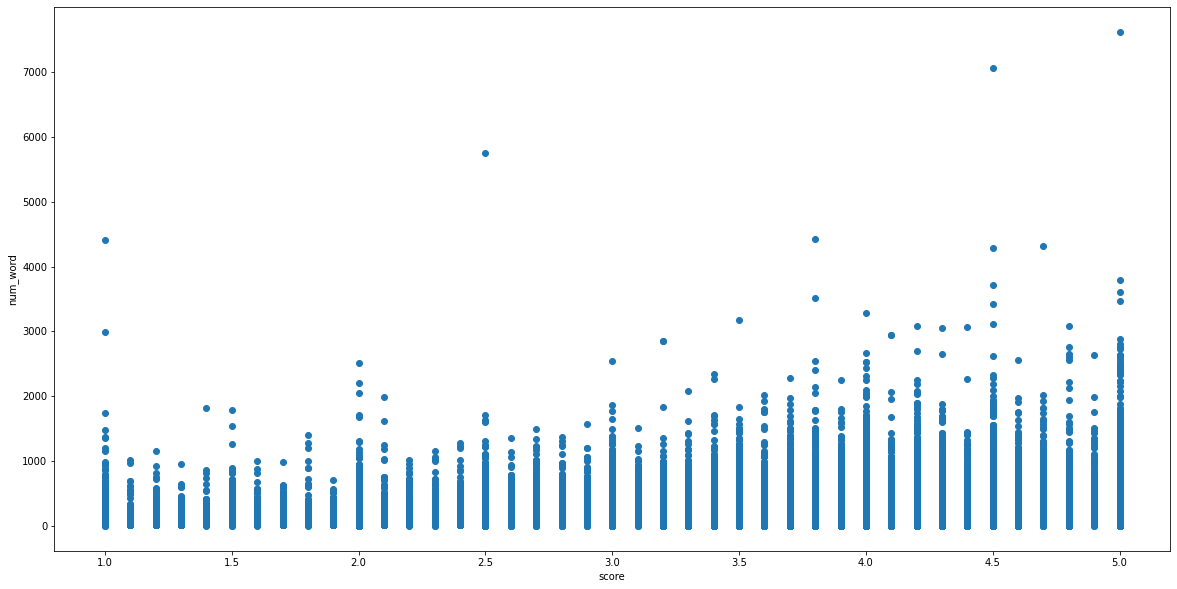

In [48]:
fig=plt.figure(figsize=(20,10))
plt.scatter(data2["score"], data2["word_num"])
plt.ylabel("num_word")
plt.xlabel("score")

In [70]:
# 日本語 WordCloud 生成
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 日本語フォント指定

def show_wordcloud(text):
  text = " ".join(text)
  wordcloud = WordCloud(font_path=fpath, background_color='white', width=300, height=300).generate(text)

  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.figure(figsize=(300,200))
  plt.show()



In [62]:
data["title"].value_counts() 

レディ・プレイヤー1|Ready Player One                      18879
インターステラー|Interstellar                            17679
インセプション|Inception                                13338
トゥルーマン・ショー|The Truman Show                       13094
オデッセイ|The Martian                                12999
                                                 ...  
|ADVENTURES OF JOHNNY TAO／QUEST OF THE DRAGON        1
|FINAL                                               1
|Reality+                                            1
|The New Mutants／X-Men: The New Mutants              1
|The Beast of Yucca Flat                             1
Name: title, Length: 342, dtype: int64

In [64]:
data["title"].sample(20)

431618                                       レプリカズ|REPLICAS
251974                                |The Butterfly Effect
411872                                     リミットレス|Limitless
353625                                    マトリックス|The Matrix
426322                          レディ・プレイヤー1|Ready Player One
60857                                     インセプション|Inception
360483                              マーズ・アタック！|Mars Attacks!
63536                                     インセプション|Inception
139674    ガーディアンズ・オブ・ギャラクシー：リミックス|Guardians of the Galax...
102853                                    オデッセイ|The Martian
40372                                       アップグレード|Upgrade
244260    ハンガー・ゲーム FINAL：レボリューション|The Hunger Games: Mock...
403169      メン・イン・ブラック：インターナショナル|Men in Black International
394594                          メン・イン・ブラック2|Men in Black II
454616                        時計じかけのオレンジ|A Clockwork Orange
163534      ジュラシック・ワールド 炎の王国|Jurassic World: Fallen Kingdom
146165                              グリーン

In [65]:
RP1 = data[data["title"] == "レディ・プレイヤー1|Ready Player One"]
Inc = data[data["title"] == "インセプション|Inception"]
WPA = data[data["title"] == "猿の惑星：聖戦記（グレート・ウォー）|War for the Planet of the Apes"]


In [68]:
del data

In [73]:
RP1.tail(1)

,title,name,time,review,score,URL,review_tokenize,word_num
431178,レディ・プレイヤー1|Ready Player One,ケンタロの感想・評価,2018-09-10 02:15:00,映画後半はスピルバーグへの感謝の気持ちで涙が溢れそうになった。ガンダムシャキーンの登場シーン...,4.5,https://filmarks.com//movies/63747?page=999,映画 後半 は ｽﾋﾟﾙﾊﾞｰｸﾞ へ の 感謝 の 気持ち で 涙 が 溢れ そう に な...,44


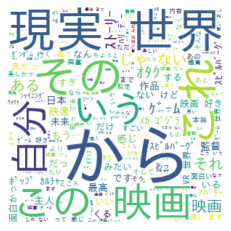

<Figure size 21600x14400 with 0 Axes>

In [71]:
show_wordcloud(RP1.review_tokenize.tolist())  

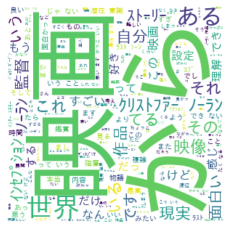

<Figure size 21600x14400 with 0 Axes>

In [74]:
show_wordcloud(Inc.review_tokenize.tolist())

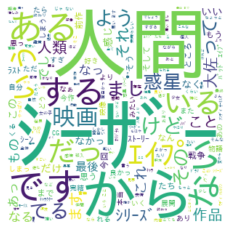

<Figure size 21600x14400 with 0 Axes>

In [75]:
show_wordcloud(WPA.review_tokenize.tolist())